## CalEnviroScreen
This notebook cleans up CalEnviroscreen data and then zooms into Inglewood in particular.

# Setting up the data

Started by importing pandas and geopandas.

In [1]:
import pandas as pd
import geopandas as gpd

I then ask pandas to read the file and converted a few of the location variables to strings in order to allow for some of the sorting and to zfill the information.

In [2]:
df = pd.read_csv('Data/Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Above, we see that the leading zero is missing from the data, so I zfilled the information. 

In [3]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [4]:
# look at the data types, verbose = True shows us all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

I then filtered to columns I was interested in examining further in this assignment.

In [5]:
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Pctl',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl']
df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

Next, I narrow this information to the county of Los Angeles.

In [6]:
df2LA = df2[df2['California County'] == 'Los Angeles']

In [7]:
df2LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Pctl        2343 non-null   float64
 7   Pop. Char. Pctl              2297 non-null   float64
 8   PM2.5 Pctl                   2343 non-null   float64
 9   Drinking Water Pctl          2326 non-null   float64
 10  Tox. Release Pctl            2343 non-null   float64
 11  Cleanup Sites Pctl           2343 non-null   float64
 12  Asthma Pctl                  2334 non-null   float64
 13  Cardiovascular Disease 

I then connected this data to geography information that we had been provided in class. This takes a couple of steps.

In [8]:
#first asking gpd to read the census information and seeing the first five rows to see how to connect the information.
tracts = gpd.read_file('Data/2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [9]:
#next I used created a column to match the data in CalEnviroscreen
tracts['Census Tract'] ='06' + '037' + tracts['CT20']

In [10]:
#And then merged the two datasets
CEStracts=tracts.merge(df2,on="Census Tract")

After this, I also confirm that the projection of the geodataframe is mercator in order to allow us to join our calenviroscreen information with information about oil wells in the county.

In [11]:
CEStracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Oil Wells Data

As we are looking at oil wells data, I added oil wells to the calenviroscreen information, although this doesn't necessarily work out very well. I also removed the filter on active oil wells as this only showed 3 non-null figures once I zoomed into Inglewood.

In [12]:
dfoil = pd.read_csv('Data/Oil_Wells.csv')

I converted this into a geodataframe in the mercator projection to pair with CalEnviroscreen

In [14]:
gdf_oil = gpd.GeoDataFrame(dfoil, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfoil.Longitude, dfoil.Latitude))

I then performed a spatial join, on the right to use the geometry from the cal enviroscreen dataset and to include oil wells located within a census tract.

In [15]:
# Perform a spatial join based on geographic coordinates
gdfoilCES = gpd.sjoin(gdf_oil, CEStracts, how='right', op='within')
gdfoilCES.head()

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,CES 4.0 Score,CES 4.0 Percentile Range,Pollution Burden Pctl,Pop. Char. Pctl,PM2.5 Pctl,Drinking Water Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.81,45-50%,29.07,55.69,57.90,83.13,59.51,0.0,26.53,75.46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.17,20-25%,19.50,25.44,55.61,77.57,59.19,0.0,19.65,55.53
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.64,55-60%,36.65,71.48,57.51,83.13,60.07,0.0,26.53,75.46
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.86,35-40%,55.73,27.61,55.00,83.13,61.00,0.0,13.06,45.13
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.07,50-55%,61.32,44.11,56.14,75.32,61.39,0.0,15.28,38.66


gdfoilCES.info()

There are some null responses in joining the datasets that we should keep in mind. It will also probably make sense to cut down on the amount of columns here as well, but for right now, I'm going to test out mapping the data.

In [16]:
gdfIW = gdfoilCES[gdfoilCES['Approximate Location'] == 'Inglewood']

In [17]:
gdfIW.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 139 entries, 1675 to 1705
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   127 non-null    float64 
 1   X                            127 non-null    float64 
 2   Y                            127 non-null    float64 
 3   OBJECTID_left                127 non-null    float64 
 4   DistrictNu                   127 non-null    object  
 5   APINumber                    127 non-null    float64 
 6   BLMWell                      127 non-null    object  
 7   DryHole                      127 non-null    object  
 8   WellStatus                   127 non-null    object  
 9   OperatorNa                   127 non-null    object  
 10  CountyName                   127 non-null    object  
 11  FieldName                    127 non-null    object  
 12  AreaName                     127 non-null    object  
 13

# Mapping and visuals

Now to think about visualizations, chart and map options. I am going to focus on the CalEnviroscreen data.

In [18]:
import plotly.express as px

In [19]:
import matplotlib.pyplot as plt
import contextily as ctx

After importing plotly, matplotlib, and contextily, I started with a map of CalEnviroscreen.

<Axes: >

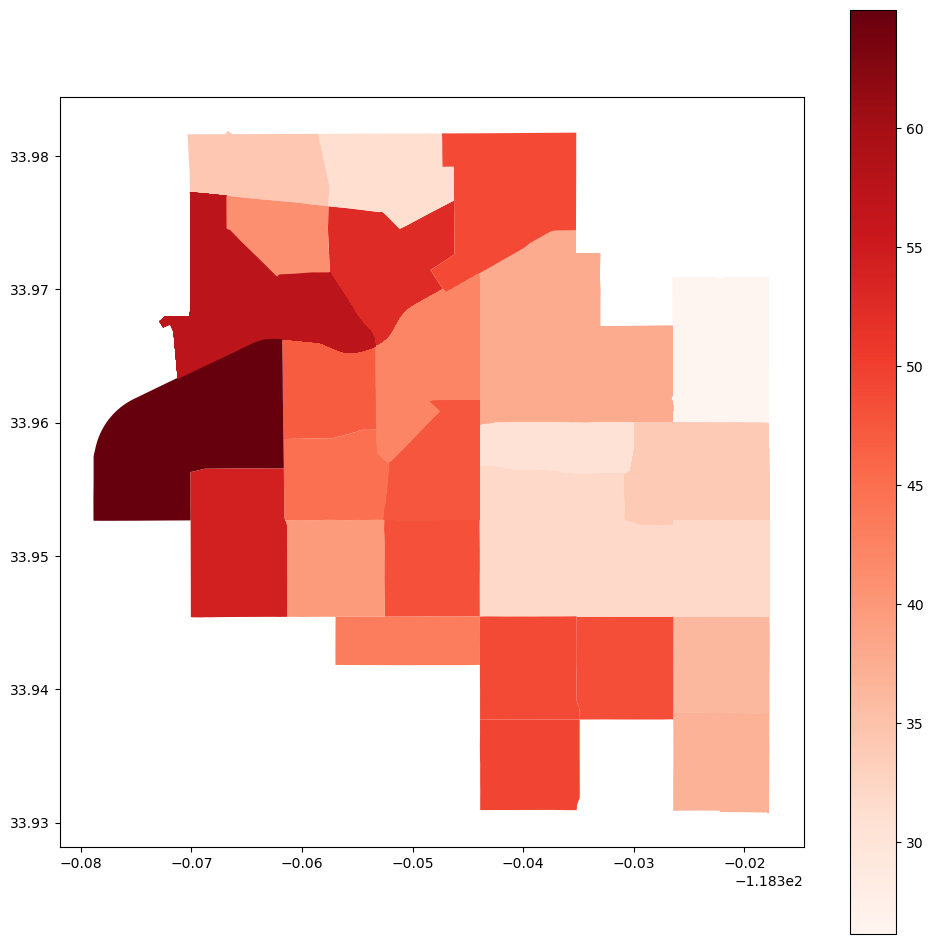

In [20]:
fig,ax = plt.subplots(figsize=(12,12))

gdfIW.plot(ax=ax,column='CES 4.0 Score',legend=True,cmap='Reds')

Next, I created a function that would run through different columns of calenviroscreen to get a sense of how the environmental and health considerations in the dataset were related to that CES score and varies across census tracts in Inglewood.

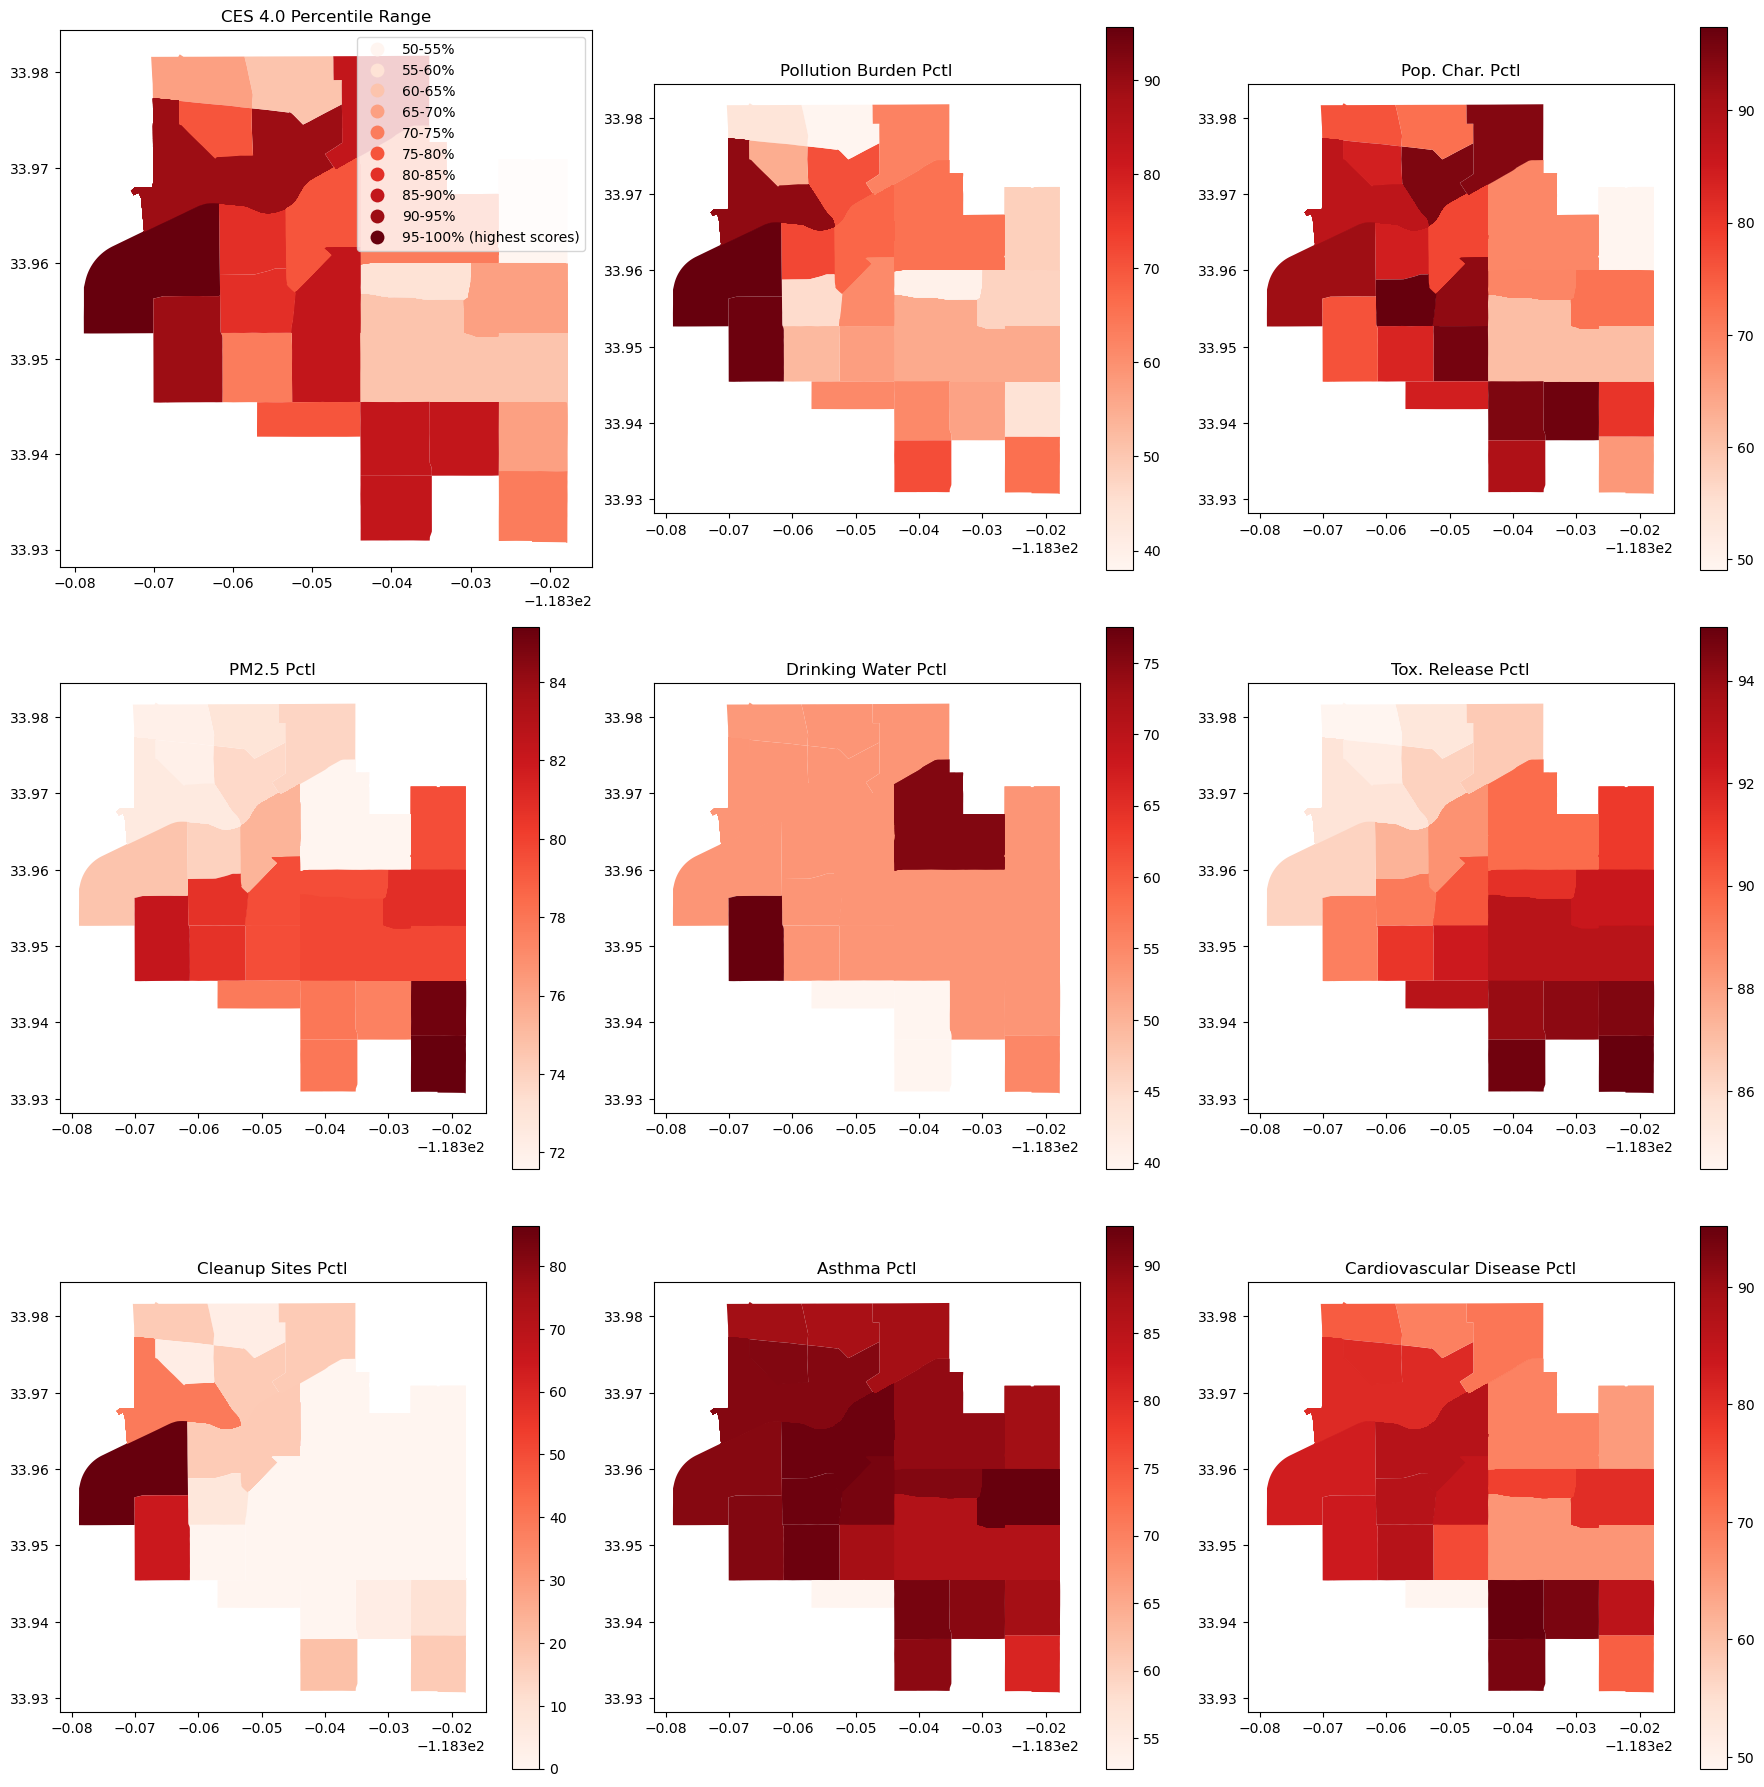

In [21]:
def plot_CES_map(gdf, factor, ax):
    gdf.plot(ax=ax, column=factor, legend=True, cmap='Reds')
    ax.set_title(factor)

def calenvirofactor():
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    axs = axs.flatten()

    # List of factors
    factors = ['CES 4.0 Percentile Range', 'Pollution Burden Pctl', 'Pop. Char. Pctl',
               'PM2.5 Pctl', 'Drinking Water Pctl', 'Tox. Release Pctl',
               'Cleanup Sites Pctl', 'Asthma Pctl', 'Cardiovascular Disease Pctl']

    for factor, ax in zip(factors, axs):
        plot_CES_map(gdfIW, factor, ax)

    plt.tight_layout()
    plt.show()

calenvirofactor()

I really like these charts and am looking forward to better being able to understand how these relate to the oil wells and other factors within the neighborhood.